In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline
import seaborn as sns

all = pd.read_csv('all.csv')
all.head()
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3563 entries, 0 to 3562
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hong        3563 non-null   float64
 1   zi          3563 non-null   int64  
 2   p1/p2       3563 non-null   float64
 3   fft         3563 non-null   float64
 4   roundindex  3563 non-null   float64
 5   eccindex    3563 non-null   float64
 6   entropy     3563 non-null   float64
 7   output      3563 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 222.8 KB


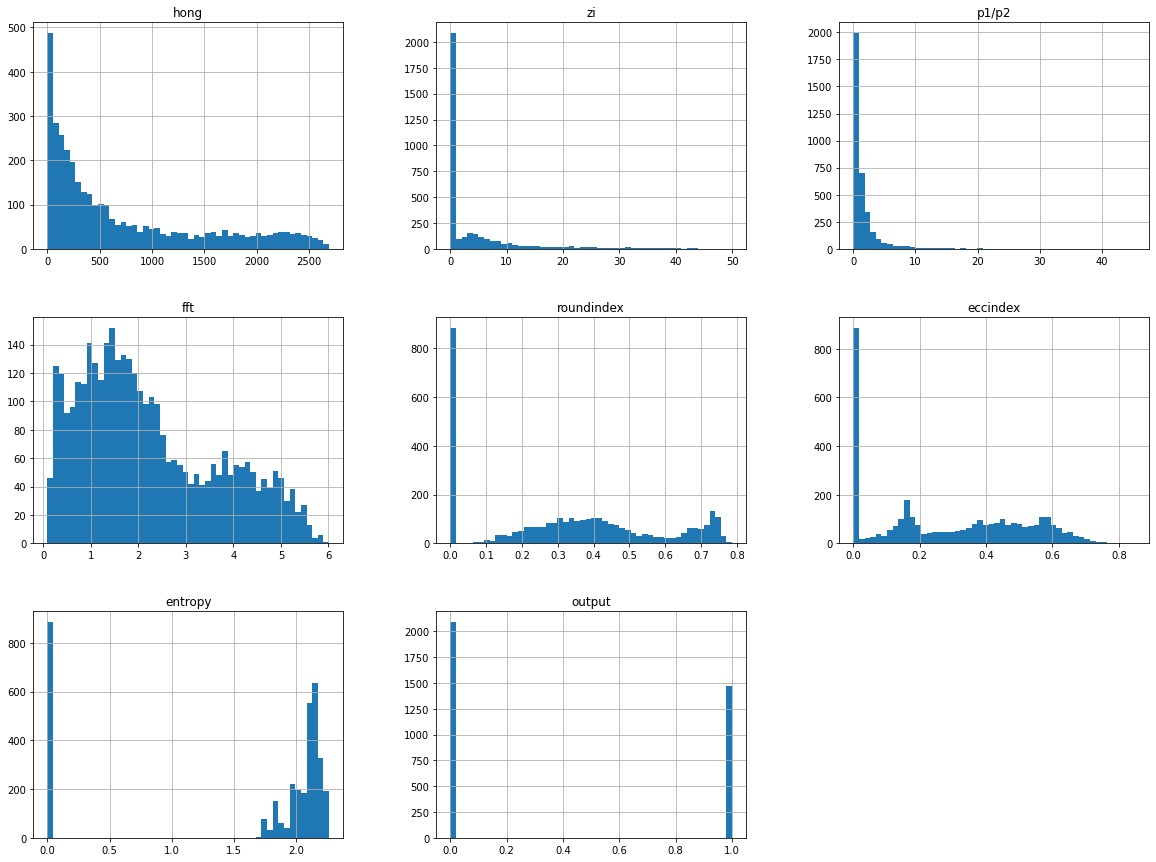

In [3]:
# %matplotlib inline   # only in a Jupyter notebook
import matplotlib.pyplot as plt
all.hist(bins=50, figsize=(20,15))
plt.show()

## 随机划分出测试集

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(all, all['output']):
    strat_train_set = all.loc[train_index]
    strat_test_set = all.loc[test_index]

In [3]:
len(strat_train_set)

2850

In [4]:
strat_test_set

,hong,zi,p1/p2,fft,roundindex,eccindex,entropy,output
620,2106.7075,32,1.6670,4.7208,0.397323,0.525065,2.25196,1
1300,440.3711,5,8.8924,1.9760,0.185452,0.455227,2.11402,1
3293,383.6248,0,0.5413,1.8807,0.134392,0.310114,2.04015,0
2951,155.0480,0,0.1243,1.4036,0.000000,0.000000,0.00000,0
1875,134.0715,0,0.1688,1.0520,0.576756,0.034810,1.96360,0
...,...,...,...,...,...,...,...,...
3547,117.8126,0,0.2169,1.1290,0.329536,0.449794,2.16333,0
2754,244.4091,0,0.4456,1.6244,0.000000,0.000000,0.00000,0
1366,904.3529,6,8.5168,3.1691,0.213822,0.593872,2.12145,1
2118,153.4041,0,0.3311,1.2459,0.000000,0.000000,0.00000,0


In [7]:
len(strat_test_set)

713

In [6]:
#将标签分离出来
train_data = strat_train_set.drop('output', axis = 1)
train_label = strat_train_set['output']

## 交叉验证

## SVM KNN 决策树 逻辑回归 朴素贝叶斯

1、决策树

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
def  display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_data, train_label)

scores = cross_val_score(tree_reg, train_data, train_label,
                         scoring="accuracy", cv=10)
display_scores(scores)

precision = cross_val_score(tree_reg,train_data, train_label,scoring='precision_weighted',cv=10)
print("Precision = ",round(100*precision.mean(),5),'%')

recall = cross_val_score(tree_reg,train_data, train_label,scoring='recall_weighted',cv=10)
print("Recall = ",round(100*recall.mean(),5),'%')

F1 = cross_val_score(tree_reg,train_data, train_label,scoring='f1_weighted',cv=10)
print("F1 = ",round(100*F1.mean(),5),'%')

# from sklearn.model_selection import cross_val_score
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeRegressor

# def  display_scores(scores):
#     print('Scores: ', scores-0.012)
#     print('Mean: ', scores.mean()-0.012)
#     print('Standard deviation: ', scores.std())

# model = DecisionTreeClassifier()
# model.fit(train_data, train_label)

# accuracy = cross_val_score(model,train_data, train_label,scoring='accuracy',cv=10)
# display_scores(accuracy)
# param = [{'criterion':['gini'],'max_depth':[30,50,60,100],'min_samples_leaf':[2,3,5,10],'min_impurity_decrease':[0.1,0.2,0.5]}]

# param_grid ={}
# param_grid['max_depth'] = [1]
# param_grid['min_samples_leaf'] = [1]
# param_grid['min_impurity_decrease'] = [0.1]

# grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,scoring='accuracy',cv=10)
# grid = GridSearchCV(estimator= model, param_grid = param_grid, scoring='accuracy', cv=10)

# grid_result = grid.fit(train_data, train_label)

# print('使用%s'%(grid_result.best_params_))


Scores:  [0.98947368 0.97894737 0.96491228 0.98245614 0.98596491 0.97192982
 0.98245614 0.98245614 0.97192982 0.99298246]
Mean:  0.9803508771929824
Standard deviation:  0.00818379213311619
Precision =  98.11372 %
Recall =  97.89474 %
F1 =  98.1049 %


In [10]:
# 预测
test_data=np.array([[1000,0,1,2,0.2,0.3,4]])
predict_result=tree_reg.predict(test_data)
print(predict_result)
# print("分类结果：{}".format(all['output'][predict_result]))
print("分类结果：{}".format([predict_result]))


[0.]
分类结果：[array([0.])]


In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=1200)
tree.plot_tree(tree_reg)
fig.savefig('result.jpg')

1.1 决策树调优

1.1.2 决策树简单预测demo

In [13]:
# 预测
test_data=np.array([[1000,0,1,2,0.2,0.3,4]])
predict_result=grid.predict(test_data)
print(predict_result)
# print("分类结果：{}".format(all['output'][predict_result]))


[0]


2、SVM

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# svm_clf = SVC(C=10, decision_function_shape='ovr', kernel='rbf')
svm_clf = SVC()
scores = cross_val_score(svm_clf, train_data, train_label,cv=10)
display_scores(scores)

precision = cross_val_score(svm_clf,train_data, train_label,scoring='precision_weighted',cv=10)
print("Precision = ",round(100*precision.mean(),5),'%')

recall = cross_val_score(svm_clf,train_data, train_label,scoring='recall_weighted',cv=10)
print("Recall = ",round(100*recall.mean(),5),'%')

F1 = cross_val_score(svm_clf,train_data, train_label,scoring='f1_weighted',cv=10)
print("F1 = ",round(100*F1.mean(),5),'%')

Scores:  [0.88070175 0.85263158 0.85964912 0.84912281 0.83508772 0.8877193
 0.84912281 0.88070175 0.84210526 0.87017544]
Mean:  0.860701754385965
Standard deviation:  0.017192982456140343
Precision =  86.34744 %
Recall =  86.07018 %
F1 =  85.86666 %


3、KNN

In [33]:
# https://blog.csdn.net/qq_29367075/article/details/113419562
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier  

# k_range = range(1, 31)

knn = KNeighborsClassifier()  # knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
scores = cross_val_score(knn, train_data, train_label,cv=10,scoring='accuracy')  
display_scores(scores)

precision = cross_val_score(knn,train_data, train_label,scoring='precision_weighted',cv=10)
print("Precision = ",round(100*precision.mean(),5),'%')

recall = cross_val_score(knn,train_data, train_label,scoring='recall_weighted',cv=10)
print("Recall = ",round(100*recall.mean(),5),'%')

F1 = cross_val_score(knn,train_data, train_label,scoring='f1_weighted',cv=10)
print("F1 = ",round(100*F1.mean(),5),'%')

Scores:  [0.92631579 0.86666667 0.89824561 0.87017544 0.89122807 0.89122807
 0.90526316 0.92631579 0.8877193  0.8877193 ]
Mean:  0.8950877192982455
Standard deviation:  0.01905427927352345
Precision =  89.53669 %
Recall =  89.50877 %
F1 =  89.45878 %


4、逻辑回归

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(
        n_splits=3,
        random_state=42,     # 设置随机种子
        shuffle=True
    )

lr = LogisticRegression()
# train_label = train_label.astype('float')
# lr_result = lr.fit(train_data, train_label)
# lr.predict(X)

accuracy = cross_val_score(lr, train_data, train_label, cv=10, scoring='accuracy')

display_scores(accuracy)

precision = cross_val_score(lr,train_data, train_label,scoring='precision_weighted',cv=10)
print("Precision = ",round(100*precision.mean(),5),'%')

recall = cross_val_score(lr,train_data, train_label,scoring='recall_weighted',cv=10)
print("Recall = ",round(100*recall.mean(),5),'%')

F1 = cross_val_score(lr,train_data, train_label,scoring='f1_weighted',cv=10)
print("F1 = ",round(100*F1.mean(),5),'%')

5、朴素贝叶斯

In [27]:
# from sklearn.model_selection import cross_val_score 
# import numpy as np
# from sklearn.naive_bayes import GaussianNB

# gaussiannb_classifier = GaussianNB()
# gaussiannb_classifier.fit(train_data, train_label)

# accuracy = cross_val_score(gaussiannb_classifier,train_data, train_label, scoring='accuracy',cv=10)
# display_scores(accuracy)

# precision = cross_val_score(gaussiannb_classifier,train_data, train_label,scoring='precision_weighted',cv=10)
# print("Precision = ",round(100*precision.mean(),5),'%')

# recall = cross_val_score(gaussiannb_classifier,train_data, train_label,scoring='recall_weighted',cv=10)
# print("Recall = ",round(100*recall.mean(),5),'%')

# F1 = cross_val_score(gaussiannb_classifier,train_data, train_label,scoring='f1_weighted',cv=10)
# print("F1 = ",round(100*F1.mean(),5),'%')

from sklearn.model_selection import cross_val_score 
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV

gaussiannb_classifier = MultinomialNB(alpha=1.0)
gaussiannb_classifier.fit(train_data, train_label)

# param_grid ={}
# param_grid['alpha'] = [100]

accuracy = cross_val_score(gaussiannb_classifier,train_data, train_label,scoring='accuracy',cv=10)
display_scores(accuracy)

# param_grid ={}

# param_grid['alpha'] = [100]

# model = MultinomialNB()

# grid = GridSearchCV(estimator= model, param_grid = param_grid, scoring='accuracy', cv=10)

# grid_result = grid.fit(train_data, train_label)

# print('最优：%s 使用%s'%(grid_result.best_score_,grid_result.best_params_))



Scores:  [0.95438596 0.94736842 0.9122807  0.90526316 0.90526316 0.9122807
 0.95087719 0.95789474 0.92631579 0.9122807 ]
Mean:  0.9284210526315789
Standard deviation:  0.020651142413420562


In [93]:
from sklearn.model_selection import cross_val_score 
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gaussiannb_classifier = GaussianNB()
gaussiannb_classifier.fit(train_data, train_label)

# accuracy = cross_val_score(gaussiannb_classifier,train_data, train_label,scoring='accuracy',cv=10)
# display_scores(accuracy)

# param_grid ={}

# param_grid['alpha'] = [0.001,0.01,0.1,1.5]

# model = MultinomialNB()

# grid = GridSearchCV(estimator= model, param_grid = param_grid, scoring='accuracy', cv=10)

accuracy = cross_val_score(gaussiannb_classifier,train_data, train_label,scoring='accuracy',cv=10)
display_scores(accuracy)

param_grid ={}

param_grid['alpha'] = [0.001,0.01,0.1,1.5]

model = MultinomialNB()

grid = GridSearchCV(estimator= model, param_grid = param_grid, scoring='accuracy', cv=10)

grid_result = grid.fit(train_data, train_label)

print('最优：%s 使用%s'%(grid_result.best_score_,grid_result.best_params_))


Scores:  [0.94385965 0.91578947 0.92982456 0.93333333 0.92982456 0.92631579
 0.95438596 0.95789474 0.94035088 0.92631579]
Mean:  0.9357894736842104
Standard deviation:  0.012558266784683008
最优：0.9284210526315789 使用{'alpha': 0.001}


## 画箱线图

            CART        SVM        KNN         LR         NB
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.967298   0.860702   0.895088   0.875439   0.928421
std     0.008344   0.018123   0.020085   0.017289   0.021768
min     0.956421   0.835088   0.866667   0.852632   0.905263
25%     0.960807   0.849123   0.887719   0.861404   0.912281
50%     0.966947   0.856140   0.891228   0.873684   0.919298
75%     0.975719   0.878070   0.903509   0.891228   0.950000
max     0.977474   0.887719   0.926316   0.898246   0.957895


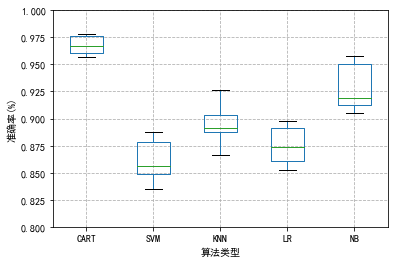

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

rcParams['axes.unicode_minus'] = False

rcParams['font.sans-serif'] = ['Simhei']

data = {"CART":[0.97747368,0.95642105,0.96694737,0.9634386,0.97747368,0.95642105,0.96694737,0.97045614,0.95992982,0.97747368],
"SVM":[0.88070175,0.85263158,0.85964912,0.84912281,0.83508772,0.8877193,0.84912281,0.88070175,0.84210526,0.87017544],
"KNN":[0.92631579,0.86666667,0.89824561,0.87017544,0.89122807,0.89122807,0.90526316,0.92631579,0.8877193,0.8877193],
"LR":[0.89473684,0.86666667,0.89824561,0.87017544,0.85614035,0.89824561,0.85263158,0.88070175,0.85964912,0.87719298],
"NB":[0.95438596,0.94736842,0.9122807,0.90526316,0.90526316,0.9122807,0.95087719,0.95789474,0.92631579,0.9122807]} 

# "CART2":[0.98947368,0.96842105,0.97894737,0.96842105,0.98947368,0.97192982,0.97894737,0.98596491,0.97192982,0.99649123],
# "NB2":[0.94385965,0.91578947,0.92982456,0.93333333,0.92982456,0.92631579,0.95438596,0.95789474,0.94035088,0.92631579]



df = pd.DataFrame(data)

df.plot.box()

plt.xlabel("算法类型",fontsize=10)

plt.ylabel("准确率(%)",fontsize=10) 
plt.grid(linestyle="--", alpha=0.99)
print(df.describe())#显示中位数、上下四分位数、标准偏差等内容

# plt.boxplot(patch_artist='red')

plt.ylim(0.8,1.0)
plt.savefig('output.jpg')
plt.show()